In [295]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('../df.csv')
df['HourUTC'] = pd.to_datetime(df['HourUTC'])
#typecast til floats
numeric_cols = ['SpotPriceEUR',
                'Forecast1Hour_Offshore Wind', 'Forecast1Hour_Onshore Wind', 'Forecast1Hour_Solar',
                'Forecast5Hour_Offshore Wind', 'Forecast5Hour_Onshore Wind', 'Forecast5Hour_Solar',
                'ForecastDayAhead_Offshore Wind', 'ForecastDayAhead_Onshore Wind', 'ForecastDayAhead_Solar',
                'ForecastIntraday_Offshore Wind', 'ForecastIntraday_Onshore Wind', 'ForecastIntraday_Solar']

df[numeric_cols] = df[numeric_cols].astype(float)

In [273]:
print(df.head(5))


              HourUTC PriceArea  SpotPriceEUR  Forecast1Hour_Offshore Wind  \
0 2022-09-01 00:00:00       DK1    486.339996                    62.916668   
1 2022-09-01 00:00:00       DK2    486.339996                    16.750000   
2 2022-09-01 01:00:00       DK1    480.019989                    24.250000   
3 2022-09-01 01:00:00       DK2    480.019989                    12.000000   
4 2022-09-01 02:00:00       DK1    495.179993                    12.375000   

   Forecast1Hour_Onshore Wind  Forecast1Hour_Solar  \
0                  130.541672             0.000417   
1                   54.500000             0.000000   
2                  115.791664             0.000000   
3                   41.625000             0.000000   
4                  100.375000             0.000000   

   Forecast5Hour_Offshore Wind  Forecast5Hour_Onshore Wind  \
0                   103.916664                  148.208328   
1                    17.583334                   40.958332   
2                   

**Undgå data leakage: Split data op i træning og validering, før NaN håndtering.**

In [292]:
df_train = df[df['HourUTC'] < df['HourUTC'].min() + pd.DateOffset(months=30)]
df_walk_forward = df[df['HourUTC'] >= df['HourUTC'].min() + pd.DateOffset(months=30)]
print(df_train.head(2))
print(df_walk_forward.head(2))

#Hvor mange dage (24 timer i døgnet, DK1 og DK2...) dag=48index
print('--------------------------------------------------------')
print(f'Train dataframe has a length of {len(df_train)} which is {len(df_train)/(24 * 2)} days')
print(f'Validation dataframe has a length of {len(df_walk_forward)} which is {len(df_walk_forward)/(24*2)}')


     HourUTC PriceArea  SpotPriceEUR  Forecast1Hour_Offshore Wind  \
0 2022-09-01       DK1    486.339996                    62.916668   
1 2022-09-01       DK2    486.339996                    16.750000   

   Forecast1Hour_Onshore Wind  Forecast1Hour_Solar  \
0                  130.541672             0.000417   
1                   54.500000             0.000000   

   Forecast5Hour_Offshore Wind  Forecast5Hour_Onshore Wind  \
0                   103.916664                  148.208328   
1                    17.583334                   40.958332   

   Forecast5Hour_Solar  ForecastDayAhead_Offshore Wind  \
0                  0.0                      100.541664   
1                  0.0                       21.666666   

   ForecastDayAhead_Onshore Wind  ForecastDayAhead_Solar  \
0                     111.166664                     0.0   
1                      40.583332                     0.0   

   ForecastIntraday_Offshore Wind  ForecastIntraday_Onshore Wind  \
0                 

**Plot Spotprice DK1 og DK2**

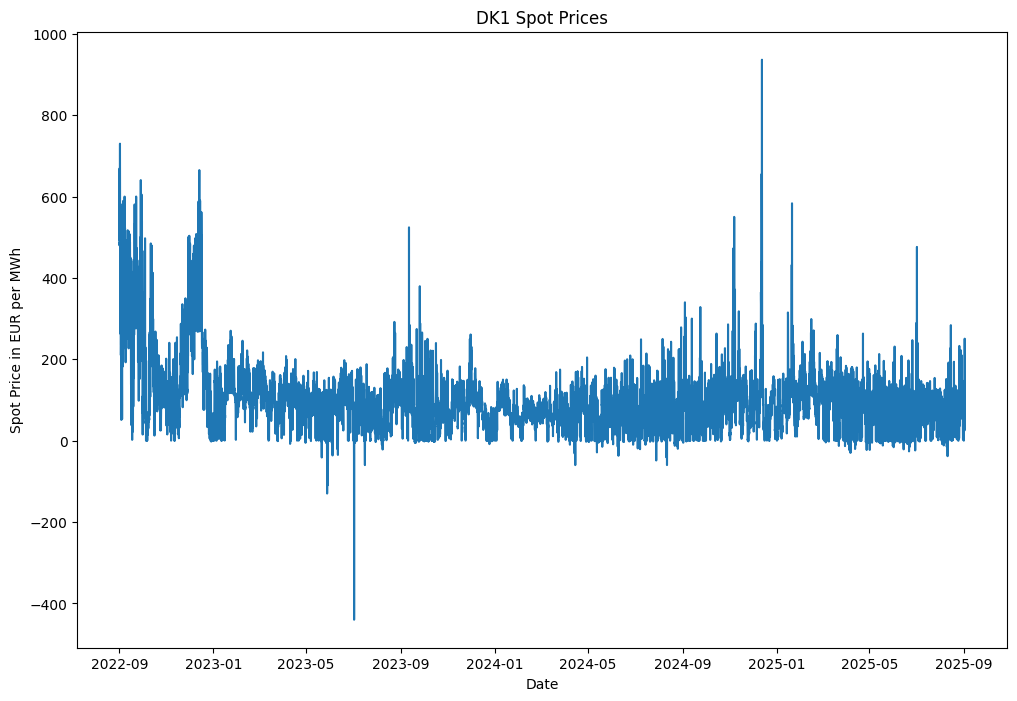

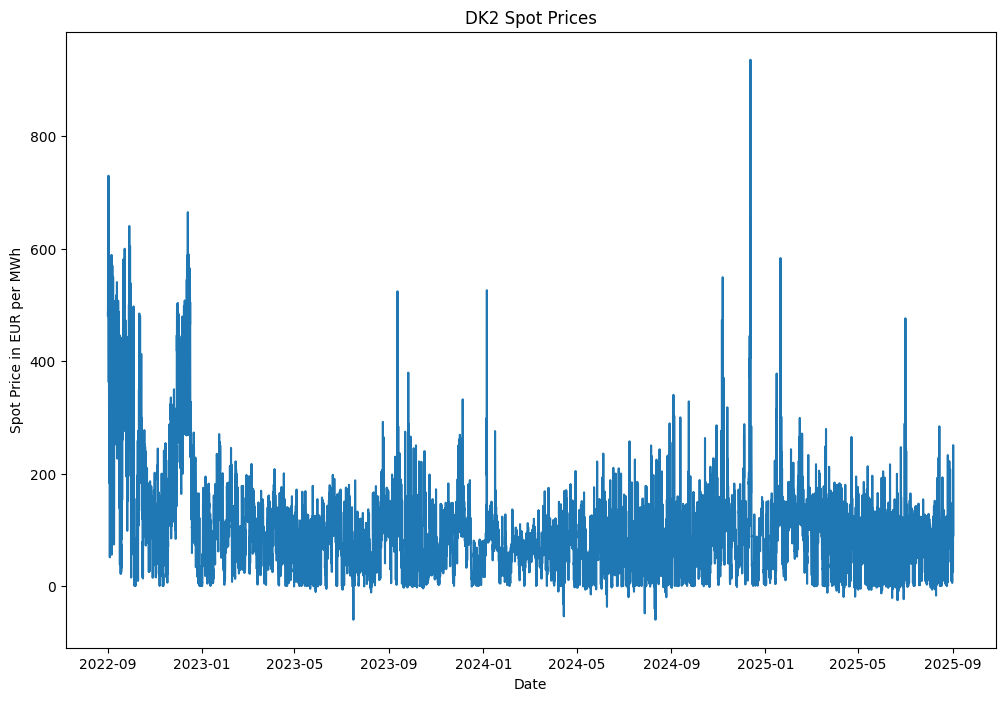

In [252]:
# DK1
dk1 = df[df['PriceArea'] == 'DK1']
plt.figure(figsize=(12,8))
plt.plot(dk1['HourUTC'], dk1['SpotPriceEUR'])
plt.xlabel('Date')
plt.ylabel('Spot Price in EUR per MWh')
plt.title('DK1 Spot Prices')
plt.show()

# DK2
dk2 = df[df['PriceArea'] == 'DK2']
plt.figure(figsize=(12,8))
plt.plot(dk2['HourUTC'], dk2['SpotPriceEUR'])
plt.xlabel('Date')
plt.ylabel('Spot Price in EUR per MWh')
plt.title('DK2 Spot Prices')
plt.show()

**Plot DK1-DK2**

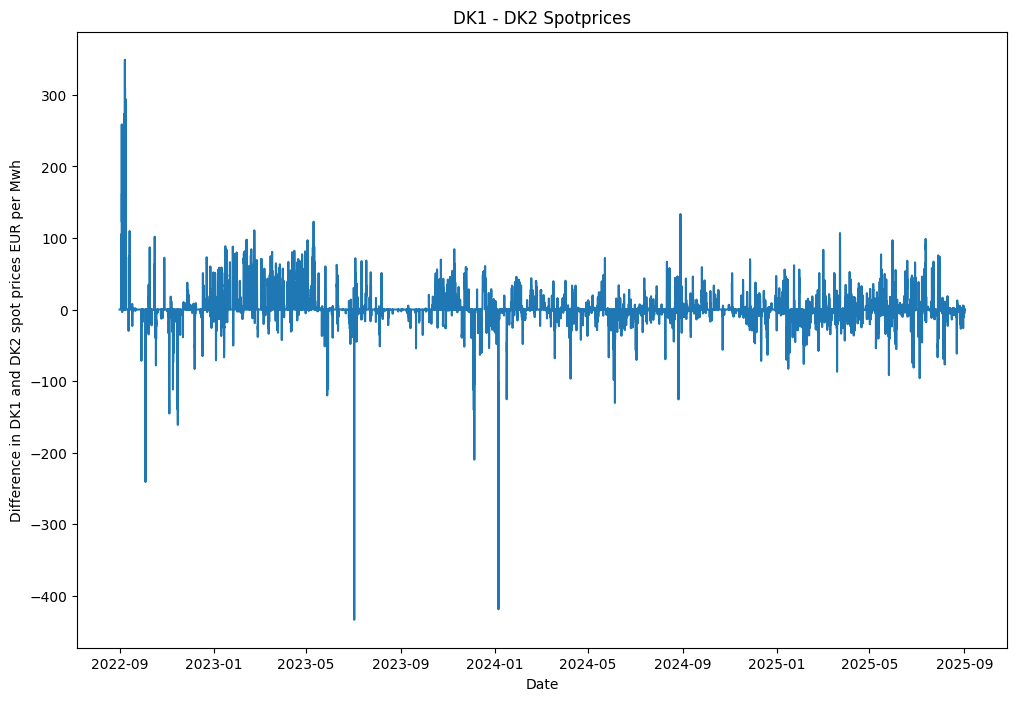

In [253]:
DK1 = df[df['PriceArea'] == 'DK1'][['HourUTC', 'SpotPriceEUR']].reset_index()
DK2 = df[df['PriceArea'] == 'DK2'][['HourUTC', 'SpotPriceEUR']].reset_index()
dif_series = DK1['SpotPriceEUR'] - DK2['SpotPriceEUR']


plt.figure(figsize=(12,8))
plt.plot(DK1['HourUTC'], dif_series)
plt.xlabel('Date')
plt.ylabel('Difference in DK1 and DK2 spot prices EUR per Mwh')
plt.title('DK1 - DK2 Spotprices')
plt.show()

**DK1 og DK2 Mean**

In [254]:
print(DK1['SpotPriceEUR'].mean())
print(DK2['SpotPriceEUR'].mean())

print(DK1[DK1['SpotPriceEUR'] > 0]['SpotPriceEUR'].mean())
print(DK2[DK2['SpotPriceEUR'] > 0]['SpotPriceEUR'].mean())


94.5707266088195
92.56632332896537
99.37425905301914
95.79903107863845


**Håndtere NaN**

HourUTC                            0.000000
PriceArea                          0.000000
SpotPriceEUR                       0.000000
Forecast1Hour_Offshore Wind        0.977705
Forecast1Hour_Onshore Wind         1.041667
Forecast1Hour_Solar                0.938871
Forecast5Hour_Offshore Wind        0.950292
Forecast5Hour_Onshore Wind         1.009686
Forecast5Hour_Solar                0.904605
ForecastDayAhead_Offshore Wind     0.657895
ForecastDayAhead_Onshore Wind      0.767544
ForecastDayAhead_Solar             0.438596
ForecastIntraday_Offshore Wind    18.672332
ForecastIntraday_Onshore Wind     18.603801
ForecastIntraday_Solar            18.599232
dtype: float64
HourUTC                           0.000000
PriceArea                         0.000000
SpotPriceEUR                      0.000000
Forecast1Hour_Offshore Wind       1.013514
Forecast1Hour_Onshore Wind        1.103604
Forecast1Hour_Solar               0.630631
Forecast5Hour_Offshore Wind       1.013514
Forecast5Hour_Onshore Wi

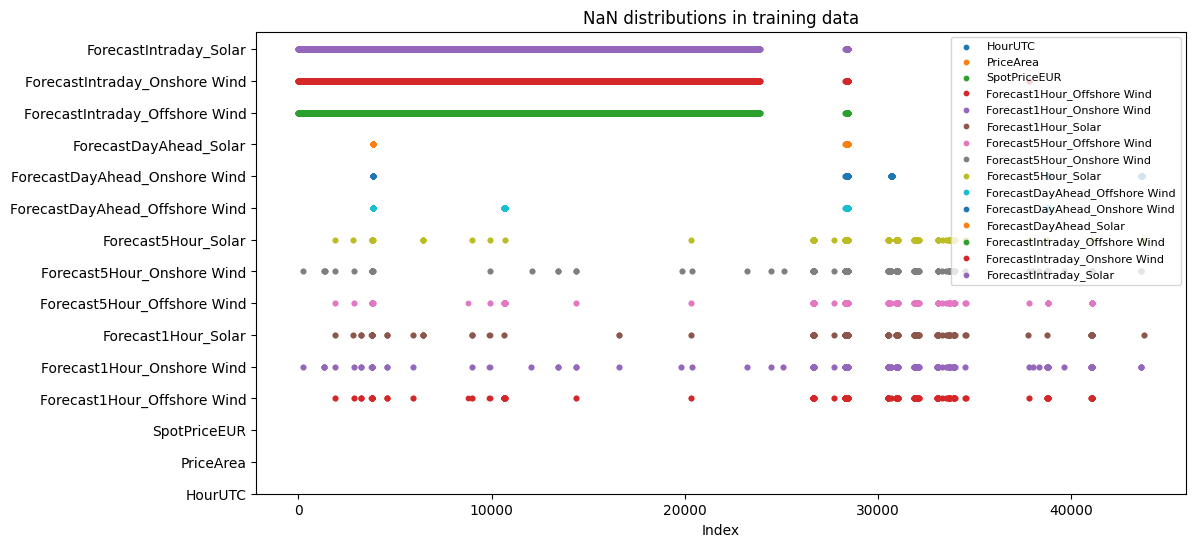

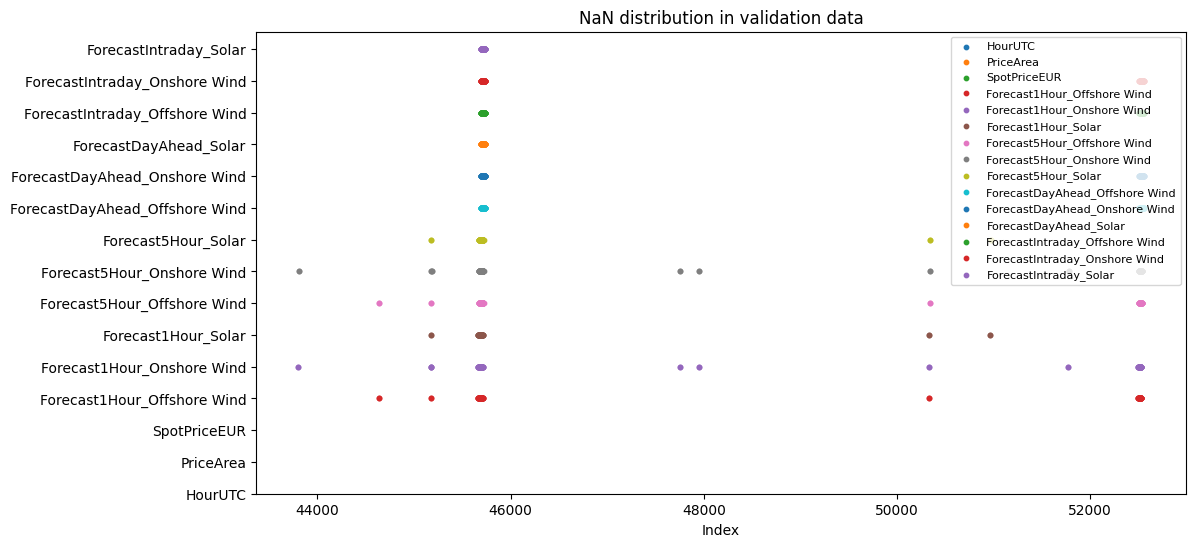

In [255]:
print(df_train.isna().mean() * 100)
print(df_walk_forward.isna().mean() * 100)

#Træningsdata
plt.figure(figsize=(12,6))

for i, col in enumerate(df_train.columns):
    na_idx = df_train.index[df_train[col].isna()]  # indeks hvor NaN
    plt.scatter(na_idx, [i]*len(na_idx), label=col, s=10)  # s=størrelse på prikker

plt.yticks(range(len(df_train.columns)), df_train.columns)
plt.xlabel('Index')
plt.title('NaN distributions in training data')
plt.legend(loc='upper right', fontsize=8)
plt.show()

#Valideringsdata
plt.figure(figsize=(12,6))

for i, col in enumerate(df_walk_forward.columns):
    na_idx = df_walk_forward.index[df_walk_forward[col].isna()]  # indeks hvor NaN
    plt.scatter(na_idx, [i]*len(na_idx), label=col, s=10)  # s=størrelse på prikker

plt.yticks(range(len(df_walk_forward.columns)), df_walk_forward.columns)
plt.xlabel('Index')
plt.title('NaN distribution in validation data')
plt.legend(loc='upper right', fontsize=8)
plt.show()


**Vi ser et klart problem. Forecast Intraday er ca 1/3 NaN for de første 25000 indexes (ish), Det her vil altså forvaske vores model hvis vi interpoleret eller backfillede....**

**her kan vi enten vælge at lave en model uden intraday forecasts ved at udladde disse kols fra vores df, eller vi kan fjerne de første 25000 indexes og lade modellen bruge parameterne**

In [256]:
cols_to_check = ['ForecastIntraday_Offshore Wind', 
                 'ForecastIntraday_Onshore Wind', 
                 'ForecastIntraday_Solar']

print(df[cols_to_check].iloc[:25000].isna().sum())

ForecastIntraday_Offshore Wind    8030
ForecastIntraday_Onshore Wind     7998
ForecastIntraday_Solar            7998
dtype: int64


In [275]:
df_train = df_train.loc[25000:].reset_index(drop=True)
print(df_train[['ForecastIntraday_Offshore Wind', 'ForecastIntraday_Onshore Wind', 'ForecastIntraday_Solar']].head())

   ForecastIntraday_Offshore Wind  ForecastIntraday_Onshore Wind  \
0                      983.666687                    2332.291748   
1                      825.083313                     399.333344   
2                      987.375000                    2328.083252   
3                      824.333313                     411.125000   
4                      989.458313                    2383.291748   

   ForecastIntraday_Solar  
0                     0.0  
1                     0.0  
2                     0.0  
3                     0.0  
4                     0.0  


**Efter at have slicet de første 25000 indexes fra, kan vi nu fokusere ekslusivt på DK1 og interpolere de restende NaN (omkring 0,7% NaN ratio spredt rundt omkring uden systematik)**

In [296]:
df_train = df_train[df_train['PriceArea'] == 'DK1']
df_walk_forward = df_walk_forward[df_walk_forward['PriceArea'] == 'DK1']

#Future warning siger infer før interpolate.
df_walk_forward = df_walk_forward.infer_objects(copy=False)
df_train = df_train.infer_objects(copy=False)

#Træningsdata
df_train = df_train.interpolate(method='linear', limit_direction='both')

#Valideringsdata
df_walk_forward = df_walk_forward.interpolate(method='linear', limit_direction='both')

#Tjek NaN ratio
print(df_train.isna().mean() * 100)
print(df_walk_forward.isna().mean() * 100)
print(df_train.head())


HourUTC                           0.0
PriceArea                         0.0
SpotPriceEUR                      0.0
Forecast1Hour_Offshore Wind       0.0
Forecast1Hour_Onshore Wind        0.0
Forecast1Hour_Solar               0.0
Forecast5Hour_Offshore Wind       0.0
Forecast5Hour_Onshore Wind        0.0
Forecast5Hour_Solar               0.0
ForecastDayAhead_Offshore Wind    0.0
ForecastDayAhead_Onshore Wind     0.0
ForecastDayAhead_Solar            0.0
ForecastIntraday_Offshore Wind    0.0
ForecastIntraday_Onshore Wind     0.0
ForecastIntraday_Solar            0.0
dtype: float64
HourUTC                           0.0
PriceArea                         0.0
SpotPriceEUR                      0.0
Forecast1Hour_Offshore Wind       0.0
Forecast1Hour_Onshore Wind        0.0
Forecast1Hour_Solar               0.0
Forecast5Hour_Offshore Wind       0.0
Forecast5Hour_Onshore Wind        0.0
Forecast5Hour_Solar               0.0
ForecastDayAhead_Offshore Wind    0.0
ForecastDayAhead_Onshore Wind     0

C:\Users\hjalt\AppData\Local\Temp\ipykernel_6716\3869309874.py:10: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_train = df_train.interpolate(method='linear', limit_direction='both')
C:\Users\hjalt\AppData\Local\Temp\ipykernel_6716\3869309874.py:13: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_walk_forward = df_walk_forward.interpolate(method='linear', limit_direction='both')
